<a href="https://colab.research.google.com/github/Maryam101/Biomedical-Image-Processing/blob/main/Exploring_a_DICOM_Image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#imports
import imageio.v2 as imageio
import scipy
import numpy as np
import matplotlib.pyplot as plt
from skimage import exposure
import platform
import pydicom

In [ ]:
#unzip data file
!unzip -q "/content/dlwpt-volumetric-dicom-lung (2).zip"

# 1. Exploring an image

In [ ]:
# read from DICOM file.
img = pydicom.dcmread("/content/000000.dcm")

a. Get patient information and Image information.


Patient Info:
---------------------------------------------------------
Patient ID: C3N-00247
Patient Name: C3N-00247
Patient Birthdate: 
Patient Gender: F
Studay Date: 20100227
Modality: CT

Image Info:
---------------------------------------------------------
Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 196
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: CT Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.3.6.1.4.1.14519.5.2.1.7085.2626.214140401149739061368142942055
(0002, 0010) Transfer Syntax UID                 UI: Explicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.40.0.13.1.1.1
(0002, 0013) Implementation Version Name         SH: 'dcm4che-1.4.35'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0008) Image Type                  

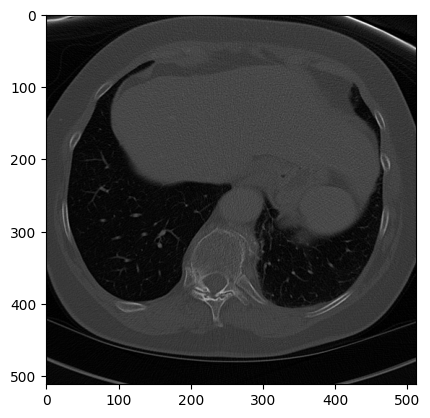

In [ ]:
#Accessing metadata
#Patient Info
print("")
print("Patient Info:")
print("---------------------------------------------------------")
patient_ID=img.PatientID
patient_name = img.PatientName
patient_birthDate=img.PatientBirthDate
patient_gender= img.PatientSex
study_date = img.StudyDate
modality=img.Modality

print("Patient ID:", patient_ID )
print("Patient Name:", patient_name)
print("Patient Birthdate:",patient_birthDate)
print("Patient Gender:",patient_gender)
print("Studay Date:", study_date)
print("Modality:", modality)


#Image info
print("")
print("Image Info:")
print("---------------------------------------------------------")
print(img)
print('')
print("image:")
import matplotlib.pyplot as plt
image = img.pixel_array
plt.imshow(image, cmap=plt.cm.gray)
plt.show()

In [ ]:
# Load the "tcia-chest-ct" directory
vol = imageio.volread("/content/dlwpt-volumetric-dicom-lung/Dicom",format='dicom')

Reading DICOM (examining files): 1/99 files (1.0%)99/99 files (100.0%)
  Found 1 correct series.
Reading DICOM (loading data): 66/99  (66.7%)99/99  (100.0%)


In [ ]:
#Read 3 images 
# Import ImageIO
import imageio.v2 as imageio


print('Shape of image array:', vol.shape)
print("")

#1. Get Shape
S0, S1, S2 = vol.shape# (Axial, Coronal, and Sagittal)
print("Shape:")
print("------------")
print("Number of Slices:\n\t", "Axial=", S0, "Slices\n\t", "Coronal=", S1, "Slices\n\t", "Sagittal=", S2, "Slices")
print("")

#2. Sampling 
# (Axial, Coronal, and Sagittal, respectively)
d0,d1,d2=vol.meta["sampling"]
# in mm
print("Sampling:")
print("-------------")
print("\t", "Axial=", d0, "mm\n\t", "Coronal=", d1, "mm\n\t", "Sagittal=", d2, "mm")
print("")

#3. Pixel Aspects
axial_asp = d1 / d2     # The aspect ratio along the axial plane
sagittal_asp = d0 / d1  # The aspect ratio along the sagittal plane
coronal_asp = d0 / d2  # The aspect ratio along the coronal plane
# Print the output
print("Pixel Aspect Ratio:")
print("------------------------")
print("\t", "Axial =", axial_asp, "\n\t", "Coronal =", coronal_asp, "\n\t", "Sagitaal =", sagittal_asp)
print("")

#4.Field of view
print("Field of View:")
print("----------------")
print("\t","Axial=", S0*d0, "mm\n\t", "Coronal=", S1*d1, "mm\n\t", "Sagittal=", S2*d2, "mm")


Shape of image array: (99, 512, 512)

Shape:
------------
Number of Slices:
	 Axial= 99 Slices
	 Coronal= 512 Slices
	 Sagittal= 512 Slices

Sampling:
-------------
	 Axial= 3.0 mm
	 Coronal= 0.564453125 mm
	 Sagittal= 0.564453125 mm

Pixel Aspect Ratio:
------------------------
	 Axial = 1.0 
	 Coronal = 5.314878892733564 
	 Sagitaal = 5.314878892733564

Field of View:
----------------
	 Axial= 297.0 mm
	 Coronal= 289.0 mm
	 Sagittal= 289.0 mm


c. Slice the image to view from different planes 

In [ ]:
import ipywidgets
import matplotlib.pyplot as plt


def slicer(axial_slice, coronal_slice, sagittal_slice):
  fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(20, 20))

  #Show the specfied slice on the axial plane "first index" with 'gray' color-map
  ax[0].imshow(vol[axial_slice,:,:], cmap='gray', aspect= axial_asp)
  ax[0].set_axis_off()
  ax[0].set_title("Axial Slice: {}".format(axial_slice))

  #Show the specfied slice on the coronal plane "second index" with 'gray' color-map
  ax[1].imshow(vol[:,coronal_slice,:], cmap='gray', aspect= coronal_asp)
  ax[1].set_axis_off()
  ax[1].set_title("Coronal Slice: {}".format(coronal_slice))

  #Show the specfied slice on the sagittal plane "third index" with 'gray' color-map
  ax[2].imshow(vol[:,:,sagittal_slice], cmap='gray', aspect= sagittal_asp)
  ax[2].set_axis_off()
  ax[2].set_title("Sagittal Slice: {}".format(sagittal_slice))
  #Render the images
  plt.show()

ipywidgets.interact(slicer,axial_slice=(0,(S0-1)), coronal_slice=(0,S1-1),
sagittal_slice=(0,S2-1))

interactive(children=(IntSlider(value=49, description='axial_slice', max=98), IntSlider(value=255, description…

<function __main__.slicer(axial_slice, coronal_slice, sagittal_slice)>